In [2]:
# Step 0: Import all essential libraries needed for the full regression project

# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For train-test splitting
from sklearn.model_selection import train_test_split, GridSearchCV

# For preprocessing: handling missing values, scaling, encoding
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# For regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# For model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For statistics and regression diagnostics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Optional: for saving the model
import joblib


In [3]:
# Step 1: 
# Load the dataset from the specified path
df = pd.read_csv(r"C:/Users/abdal/Desktop/r/kc_house_data.csv")

# Display the first 5 rows of the dataset
print(df.head())

# Display summary info including data types and non-null counts
print(df.info())

# Display descriptive statistics for numerical features
print(df.describe())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [4]:
# Step 2: Split the dataset into features (X) and target (y), then into train and test sets

# Separate the target variable (price) from the features
X = df.drop('price', axis=1)  # Drop the target column
y = df['price']               # Define the target column

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show the shape of the splits to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (17290, 20)
X_test shape: (4323, 20)
y_train shape: (17290,)
y_test shape: (4323,)


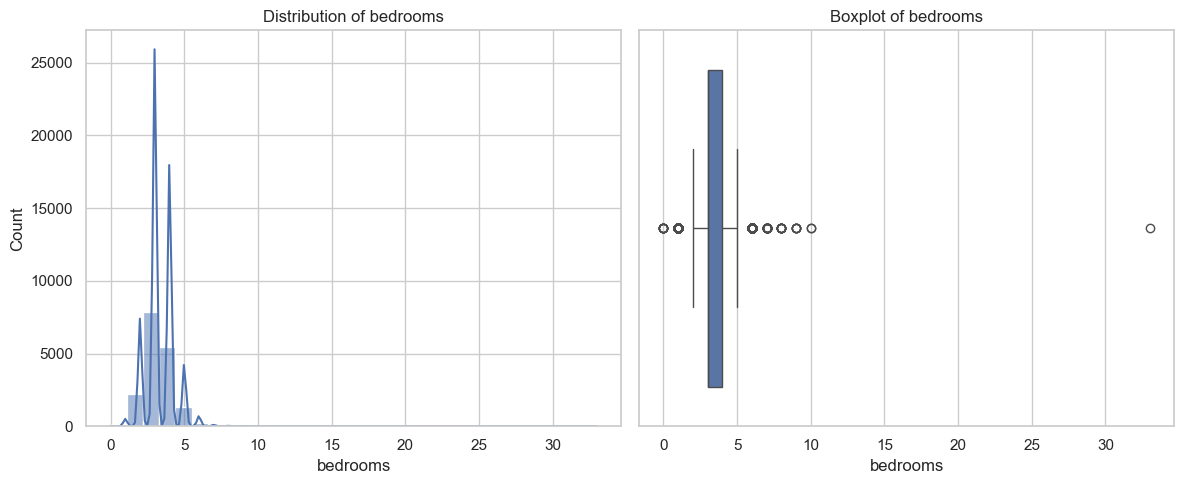

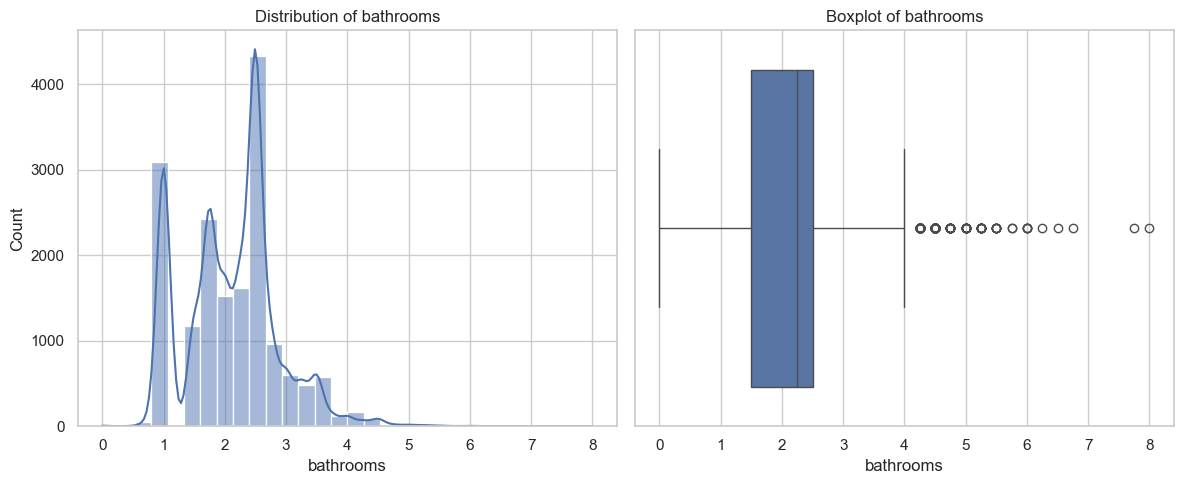

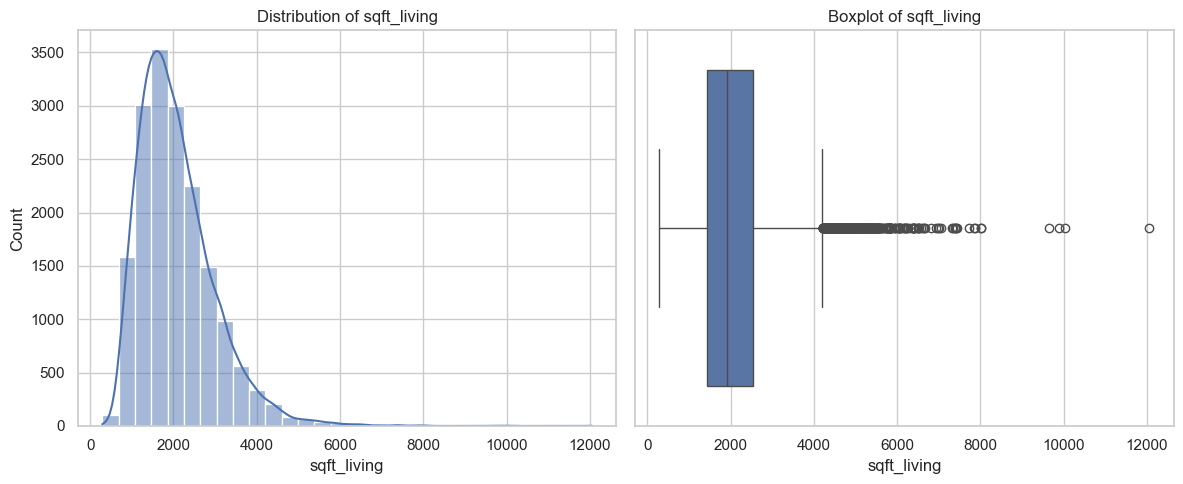

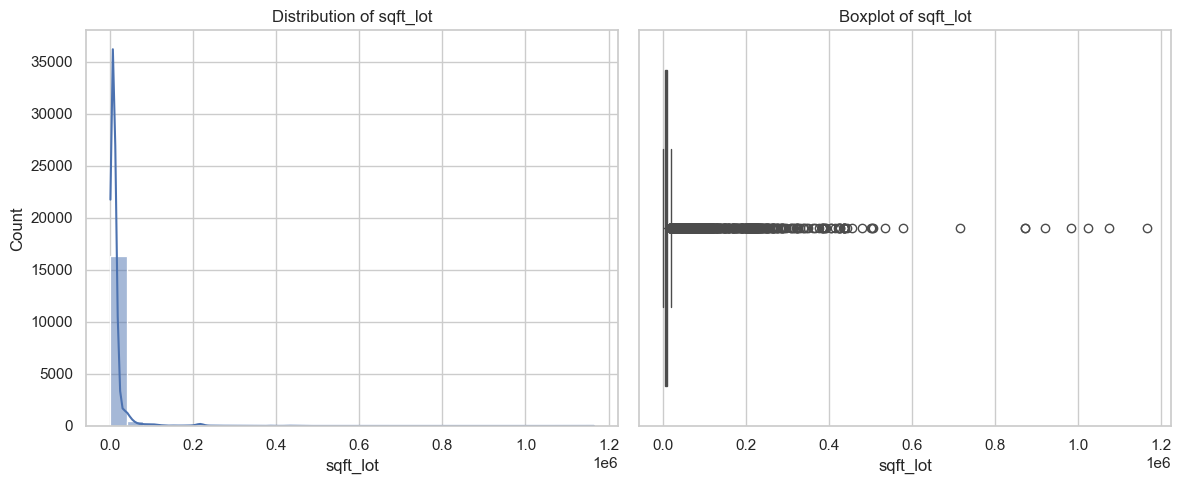

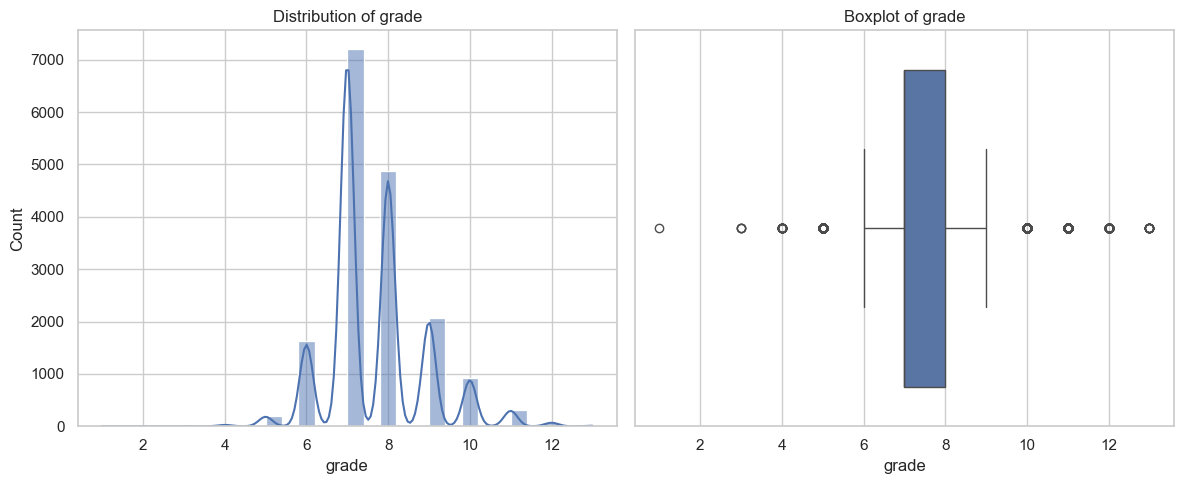

In [5]:
# Step 3a: Visualize distributions of important numerical features using histograms and boxplots

# Set Seaborn style for better visuals
sns.set(style='whitegrid')

# List of features to visualize
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade']

# Loop through each feature and plot histogram and boxplot
for col in features:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


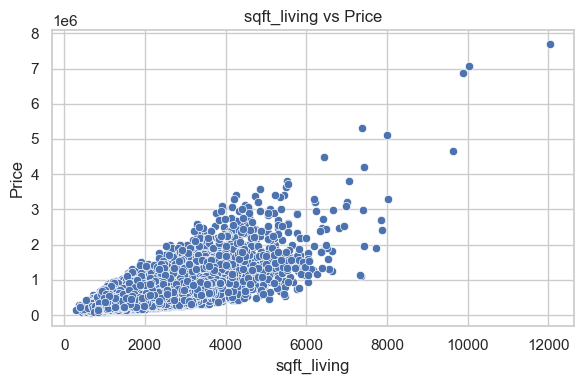

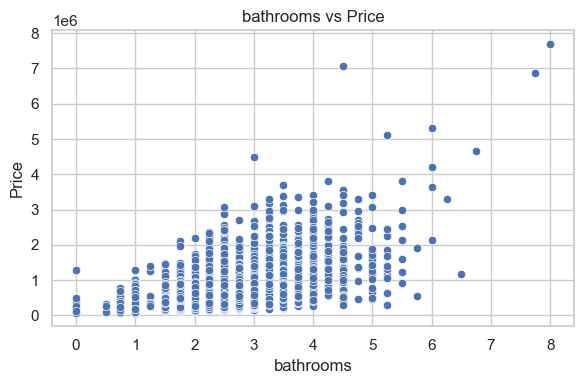

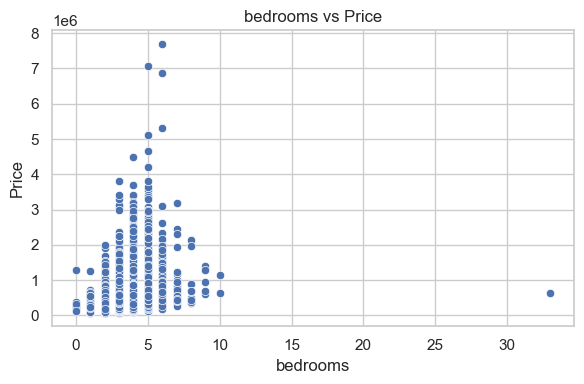

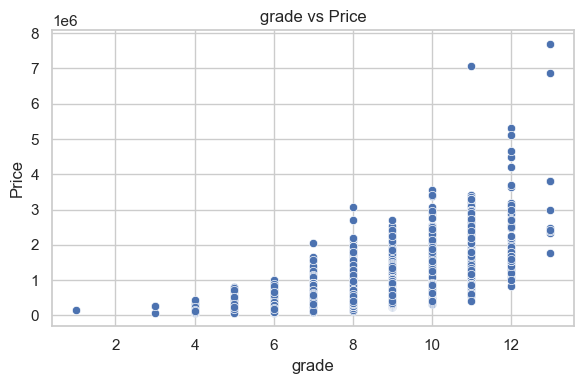

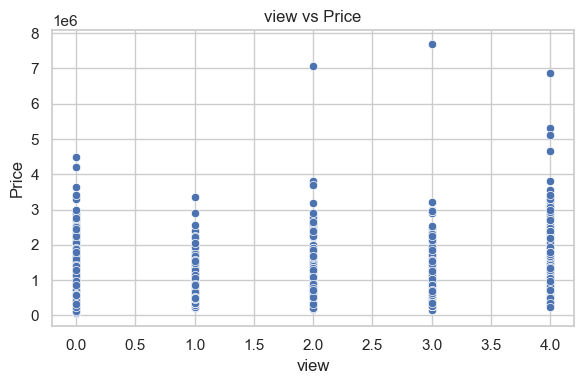

In [6]:
# Step 3c: Scatter plots between selected features and the target variable 'price'

import matplotlib.pyplot as plt
import seaborn as sns

# Select important features to compare with price
scatter_features = ['sqft_living', 'bathrooms', 'bedrooms', 'grade', 'view']

# Loop through each feature and plot scatter plot against price
for col in scatter_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()


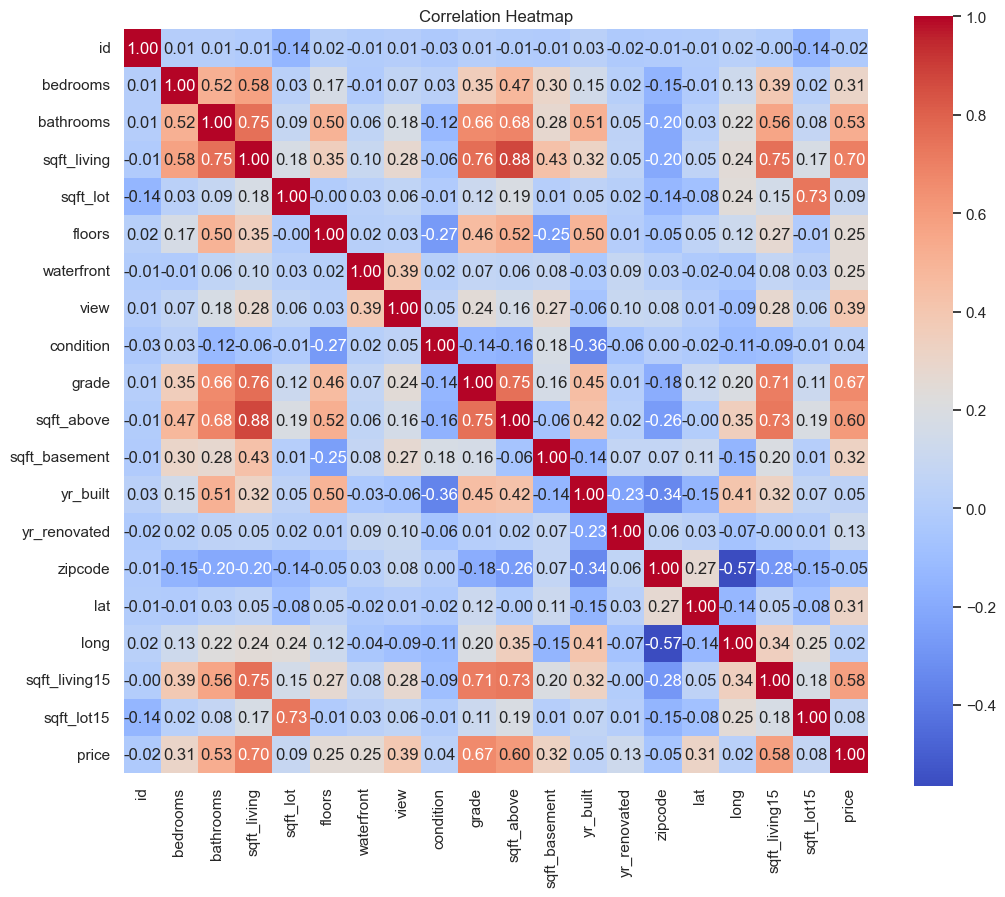

In [7]:
# Step 3d: Correlation heatmap for numeric features only

# Combine X_train and y_train temporarily to include 'price'
eda_df = X_train.copy()
eda_df['price'] = y_train

# Select only numeric columns (exclude strings like 'date')
numeric_df = eda_df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


Explained Variance Ratio per Component:
PC1: 0.2740
PC2: 0.1159
PC3: 0.0997
PC4: 0.0728
PC5: 0.0649
PC6: 0.0529
PC7: 0.0500
PC8: 0.0455
PC9: 0.0435
PC10: 0.0352
PC11: 0.0319
PC12: 0.0262
PC13: 0.0212
PC14: 0.0169
PC15: 0.0143
PC16: 0.0132
PC17: 0.0119
PC18: 0.0100
PC19: 0.0000


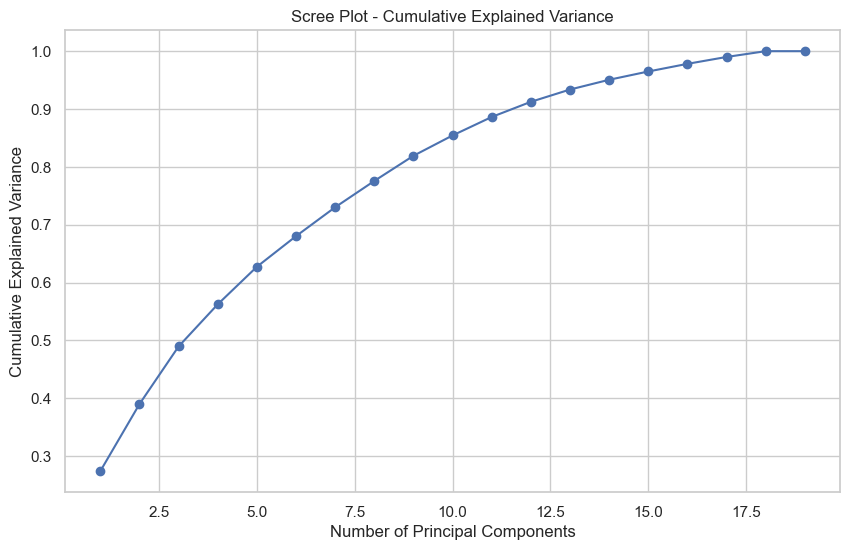

In [8]:
# Step 3e: Apply PCA and analyze the explained variance

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Keep only numeric columns for PCA
pca_data = X_train.select_dtypes(include=['number']).copy()

# Standardize the numeric features
scaler = StandardScaler()
pca_scaled = scaler.fit_transform(pca_data)

# Apply PCA with all components
pca = PCA()
pca_components = pca.fit_transform(pca_scaled)

# Print explained variance ratio
print("Explained Variance Ratio per Component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

# Plot cumulative explained variance (Scree Plot)
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [9]:
# Step 5a: Check for missing values in the training set only

# Count missing values in each column
missing_counts = X_train.isnull().sum()

# Keep only columns that have missing values
missing_counts = missing_counts[missing_counts > 0]

# Print the columns with missing values and their counts
print("Missing Values in X_train:")
print(missing_counts)


Missing Values in X_train:
Series([], dtype: int64)


In [10]:
# Step 6a: Detect outliers using IQR method for selected numerical columns

# List of numeric columns to check
cols_to_check = ['sqft_living', 'sqft_lot', 'bathrooms', 'bedrooms']

# Loop through each column to detect outliers
for col in cols_to_check:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = ((X_train[col] < lower_bound) | (X_train[col] > upper_bound)).sum()

    print(f"{col}: {outliers} outliers detected")


sqft_living: 459 outliers detected
sqft_lot: 1917 outliers detected
bathrooms: 209 outliers detected
bedrooms: 419 outliers detected


In [11]:
# Step 6b: Cap outliers using 1st and 99th percentiles for consistency and stability

# Define function to cap a column based on lower and upper percentiles
def cap_outliers(df, col):
    q1 = df[col].quantile(0.01)   # 1st percentile
    q99 = df[col].quantile(0.99)  # 99th percentile
    df[col] = df[col].clip(lower=q1, upper=q99)  # Apply capping
    return q1, q99  # Return thresholds for test set

# Columns we want to cap
cols_to_cap = ['sqft_living', 'sqft_lot', 'bathrooms', 'bedrooms']

# Store thresholds so we can apply them to X_test
cap_thresholds = {}

# Apply capping to X_train and save thresholds
for col in cols_to_cap:
    q1, q99 = cap_outliers(X_train, col)
    cap_thresholds[col] = (q1, q99)

# Apply same thresholds to X_test
for col in cols_to_cap:
    q1, q99 = cap_thresholds[col]
    X_test[col] = X_test[col].clip(lower=q1, upper=q99)


In [12]:
print("Number of unique zipcodes:", X_train['zipcode'].nunique())


Number of unique zipcodes: 70


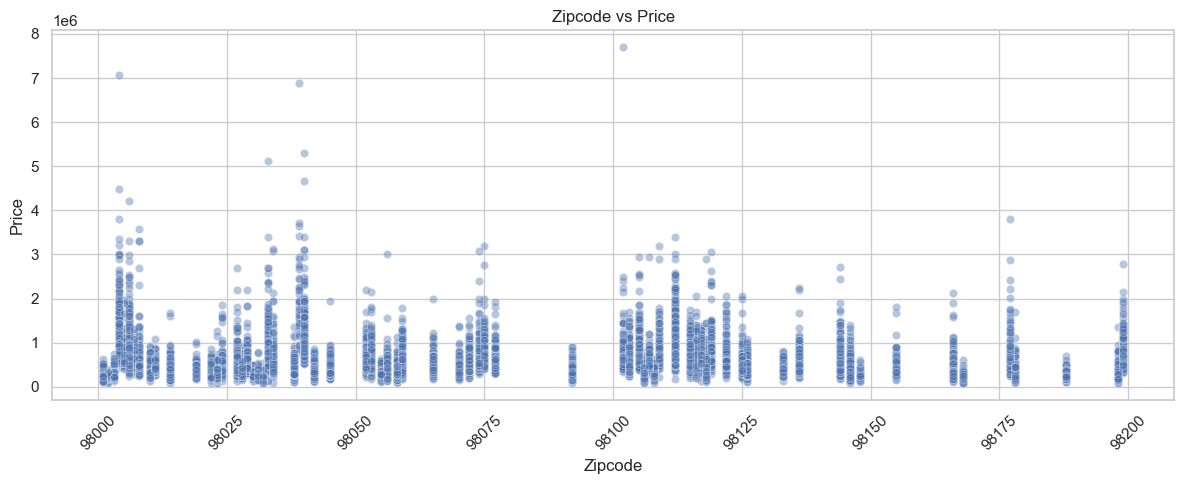

In [13]:
# Scatter plot to check relationship between zipcode and price
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.scatterplot(x=X_train['zipcode'], y=y_train, alpha=0.4)
plt.title('Zipcode vs Price')
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Step 7: Feature Engineering - Final Version (Safe Order)

# 1. Create new feature: house_age (before dropping yr_built)
X_train['house_age'] = 2025 - X_train['yr_built']
X_test['house_age'] = 2025 - X_test['yr_built']

#  2. Create new feature: renovated_flag (before dropping yr_renovated)
X_train['renovated_flag'] = X_train['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
X_test['renovated_flag'] = X_test['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

#  3. Now drop the irrelevant/redundant columns
cols_to_drop = ['id', 'date', 'yr_built', 'yr_renovated', 'sqft_above']
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')


In [15]:
# Step 8 - Part 1: Define numerical and categorical feature columns

#  Updated list of numerical features
numerical_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age'
]

#  Updated categorical features (zipcode + renovated_flag)
categorical_features = ['zipcode', 'renovated_flag']

# Pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#  Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#  Combine both pipelines into one ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])


In [16]:
from sklearn.linear_model import LinearRegression

#  Build the final pipeline (Preprocessing + Model)
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),      # Preprocessing pipeline
    ('regressor', LinearRegression())    # Regression model
])

# Train on training data
model_pipeline.fit(X_train, y_train)

#  Predict on test data
y_pred = model_pipeline.predict(X_test)


In [ ]:
#Here we Strat THE ML Regression View
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Step 1 Define numeric and categorical columns
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 2 -Define pipelines for preprocessing
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#Step 3- Combine them into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

R² Score: 0.6769403982611515
MAE: 128223.88214770307
MSE: 48839088453.88859


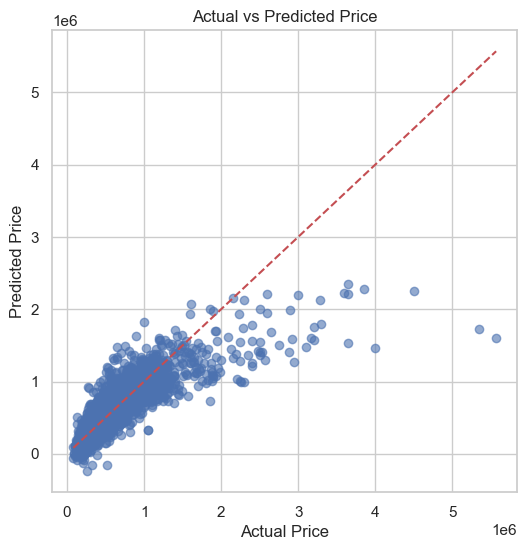

In [ ]:
# Step 4- Create the full pipeline
linreg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

#Step 5 Fit the model
linreg_pipeline.fit(X_train, y_train)

# Step 6- Predict and evaluate
y_pred = linreg_pipeline.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()